In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\nt397\Downloads\Financials.csv")
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


In [3]:
df.isnull().sum()

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [5]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [6]:
df.columns=df.columns.str.strip()

In [7]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [8]:
# Function to convert values in parentheses to negative numbers
def convert_parentheses(val):
    try:
        if isinstance(val, str):
            val = val.replace(',', '')  # Remove commas
            if val.startswith('(') and val.endswith(')'):
                return -float(val[1:-1])  # Convert (1000) → -1000.0
            else:
                return float(val)  # Convert '1000' → 1000.0
        else:
            return val  # Return numeric values as-is
    except:
        return val  # Return original value if conversion fails


In [9]:
columns_to_clean = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

In [10]:
for col in columns_to_clean:
    # Convert to string and remove $, commas
    df[col] = df[col].astype(str).str.replace(',', '').str.replace('$', '')

    # Convert to numeric safely, setting errors='coerce' will turn invalid values into NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop rows with NaN in this column
    df.dropna(subset=[col], inplace=True)
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
53,Government,France,Paseo,Low,3945.0,10.0,7.0,27615.0,276.15,27338.85,19725.0,7613.85,01/01/2014,1,January,2014
54,Midmarket,France,Paseo,Low,2296.0,10.0,15.0,34440.0,344.40,34095.60,22960.0,11135.60,01/02/2014,2,February,2014
55,Government,France,Paseo,Low,1030.0,10.0,7.0,7210.0,72.10,7137.90,5150.0,1987.90,01/05/2014,5,May,2014
56,Government,France,Velo,Low,639.0,120.0,7.0,4473.0,44.73,4428.27,3195.0,1233.27,01/11/2014,11,November,2014
57,Government,Canada,VTT,Low,1326.0,250.0,7.0,9282.0,92.82,9189.18,6630.0,2559.18,01/03/2014,3,March,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,01/04/2014,4,April,2014


In [11]:
for col in columns_to_clean:
   df[col] = df[col].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 53 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              584 non-null    object 
 1   Country              584 non-null    object 
 2   Product              584 non-null    object 
 3   Discount Band        584 non-null    object 
 4   Units Sold           584 non-null    float64
 5   Manufacturing Price  584 non-null    float64
 6   Sale Price           584 non-null    float64
 7   Gross Sales          584 non-null    float64
 8   Discounts            584 non-null    float64
 9   Sales                584 non-null    float64
 10  COGS                 584 non-null    float64
 11  Profit               584 non-null    float64
 12  Date                 584 non-null    object 
 13  Month Number         584 non-null    int64  
 14  Month Name           584 non-null    object 
 15  Year                 584 non-null    int64  

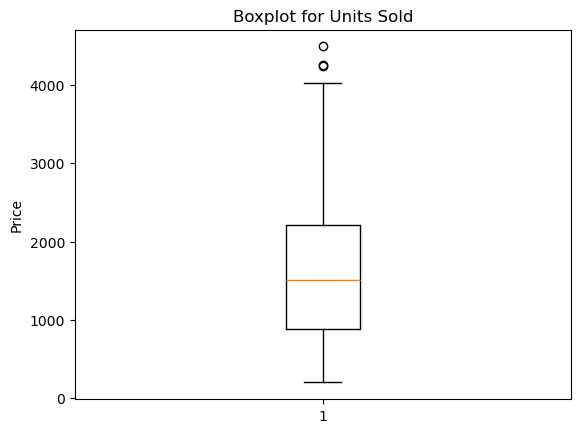

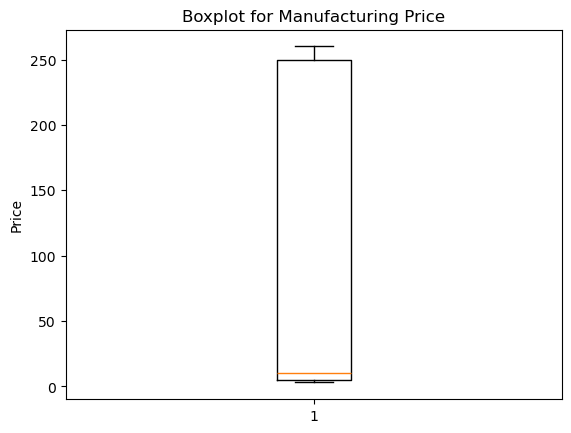

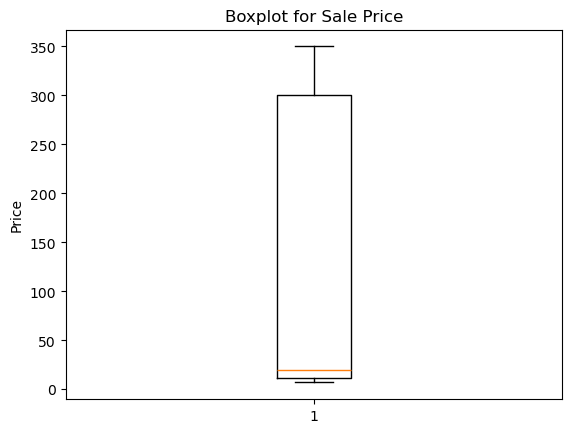

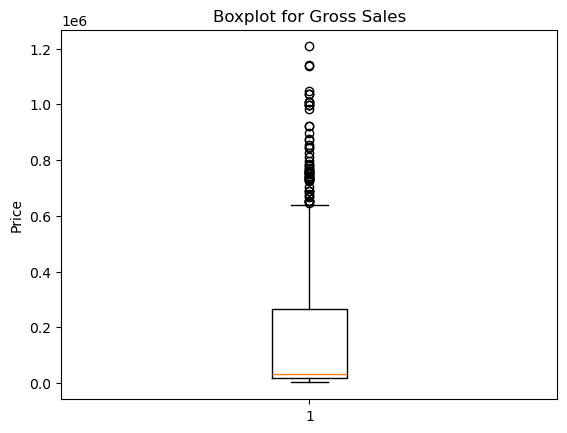

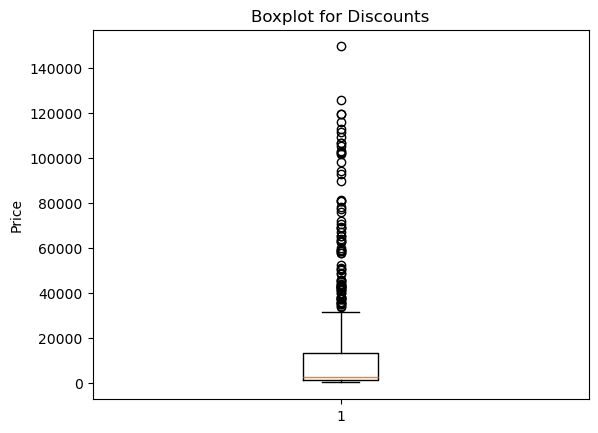

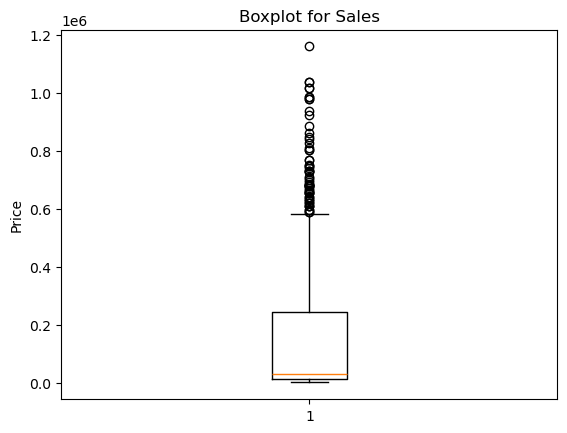

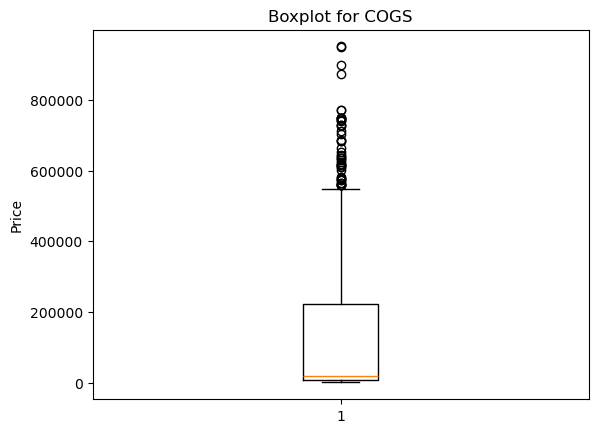

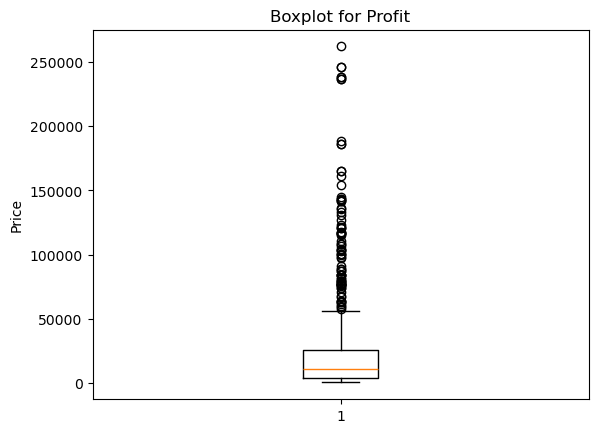

In [13]:
for col in columns_to_clean: 
   plt.boxplot(df[col])
   plt.title(f'Boxplot for {col}')
   plt.ylabel('Price')
   plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x1d64e58aa20>,
 'caps': [<matplotlib.lines.Line2D at 0x1d64e589010>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d64e4d6d80>],
 'medians': [<matplotlib.lines.Line2D at 0x1d64db6b320>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d64e56a060>],
 'means': []}

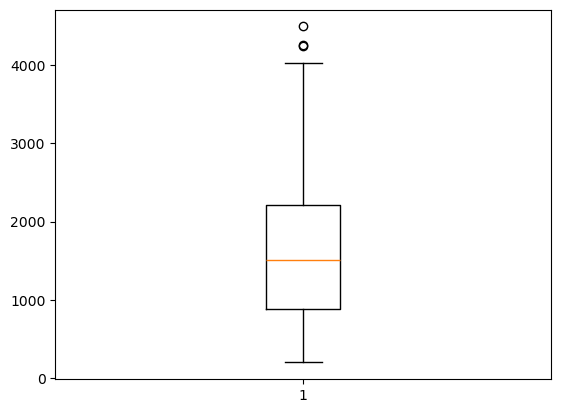

In [14]:
q1 = df['Units Sold'].quantile(0.25)
q3 = df['Units Sold'].quantile(0.75)

iqr = q3 - q1

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

outliers = df[(df['Units Sold'] > upper) | (df['Units Sold'] < lower)]

# print("Number of outliers:", len(outliers))
# print(outliers)
df_final= df[(df['Units Sold'] < upper) | (df['Units Sold'] > lower)]
n=df_final['Units Sold']
plt.boxplot(n)

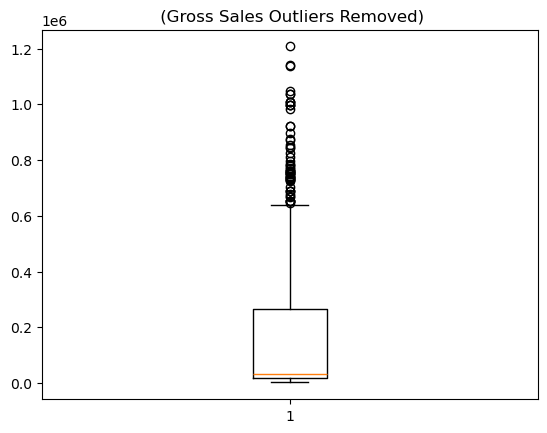

In [15]:
q1 = df['Gross Sales'].quantile(0.25)
q3 = df['Gross Sales'].quantile(0.75)

iqr = q3 - q1

upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)

outliers = df[(df['Gross Sales'] > upper) | (df['Gross Sales'] < lower)]

# print("Number of outliers:", len(outliers))
# print(outliers)

df_final= df[(df['Gross Sales'] < upper) | (df['Gross Sales'] > lower)]
n=df_final['Gross Sales']
plt.boxplot(n)
plt.title(" (Gross Sales Outliers Removed)")
plt.show()

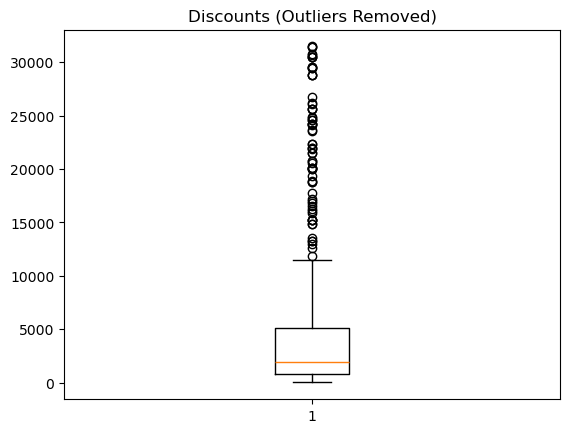

In [16]:
s = df['Discounts']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Filtered values
p = s[(s >= lower) & (s <= upper)]

plt.boxplot(p)
plt.title("Discounts (Outliers Removed)")
plt.show()



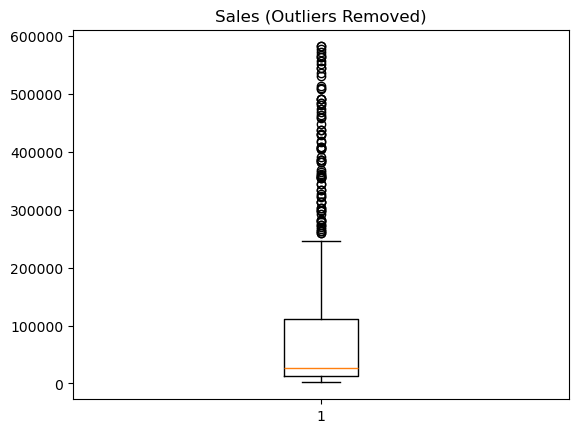

In [17]:
s = df['Sales']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Filtered values
p = s[(s >= lower) & (s <= upper)]

plt.boxplot(p)
plt.title("Sales (Outliers Removed)")
plt.show()

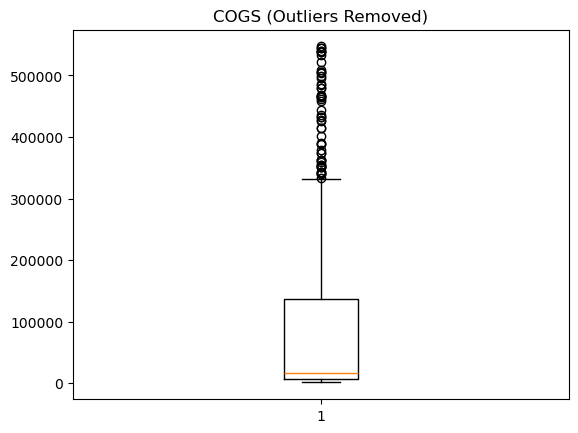

In [18]:
s = df['COGS']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Filtered values
p = s[(s >= lower) & (s <= upper)]

plt.boxplot(p)
plt.title("COGS (Outliers Removed)")
plt.show()

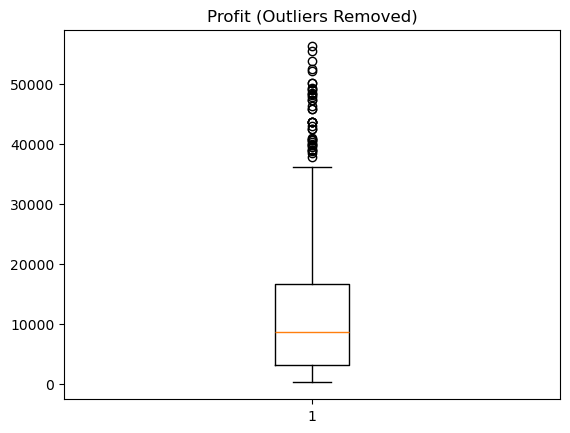

In [31]:
s = df['Profit']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Filtered values
p = s[(s >= lower) & (s <= upper)]

plt.boxplot(p)
plt.title("Profit (Outliers Removed)")
plt.show()

In [32]:
df2 = df.groupby('Product')[['Sales','Profit','Discounts']].mean()
df2

,Sales,Profit,Discounts
Product,,,
Amarilla,188206.349605,34248.389079,14297.183553
Carretera,141153.838533,24862.265200,10332.201600
Montana,168506.592597,26343.501688,13427.160649
Paseo,162020.356705,25471.541676,13567.683873
VTT,184297.712979,29279.532128,13574.334894
Velo,169253.064270,25614.817079,15237.053820


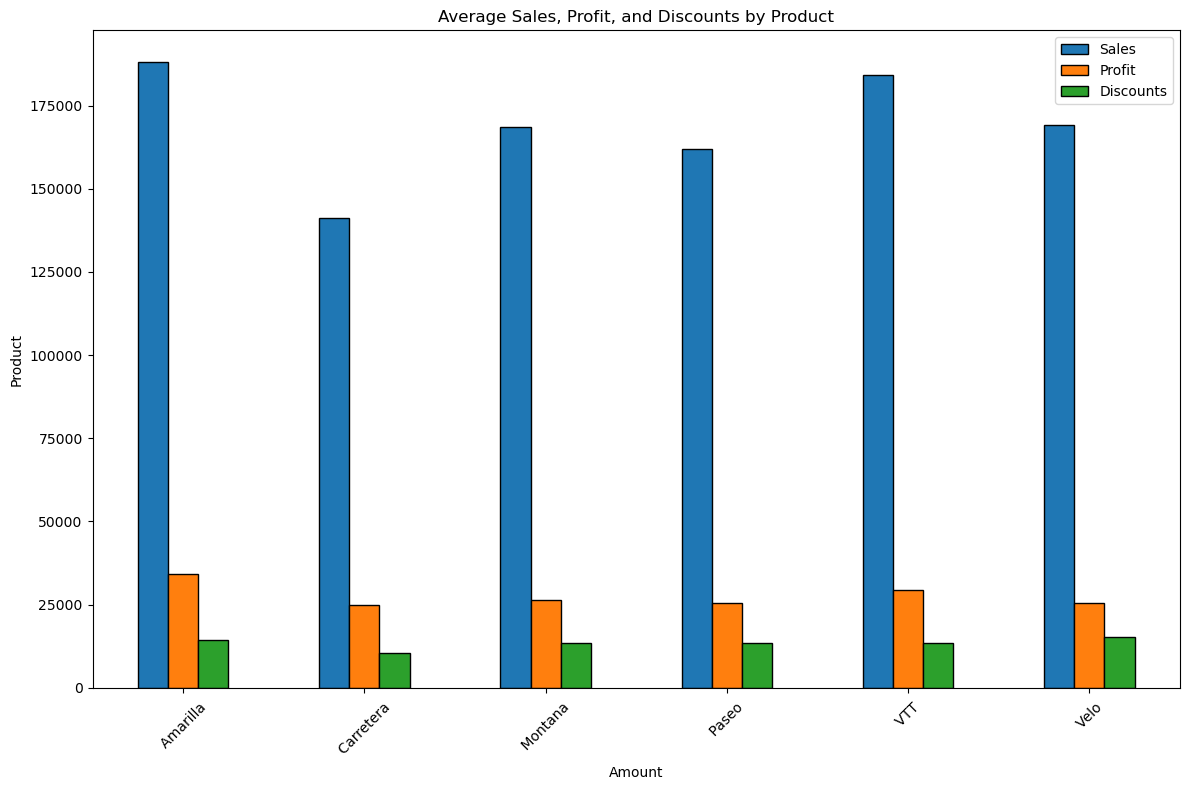

In [41]:
ax = df2.plot(kind='bar', figsize=(12, 8), edgecolor='black')

plt.xlabel("Amount")
plt.ylabel("Product")
plt.title("Average Sales, Profit, and Discounts by Product")
plt.xticks(rotation=45)

plt.tight_layout()

In [42]:
# Which  country is the most profitable?
df_profit=df.groupby('Country')['Profit'].mean()
df_profit

Country
Canada                      28051.789322
France                      28328.385932
Germany                     28892.005089
Mexico                      24739.331441
United States of America    26496.289661
Name: Profit, dtype: float64

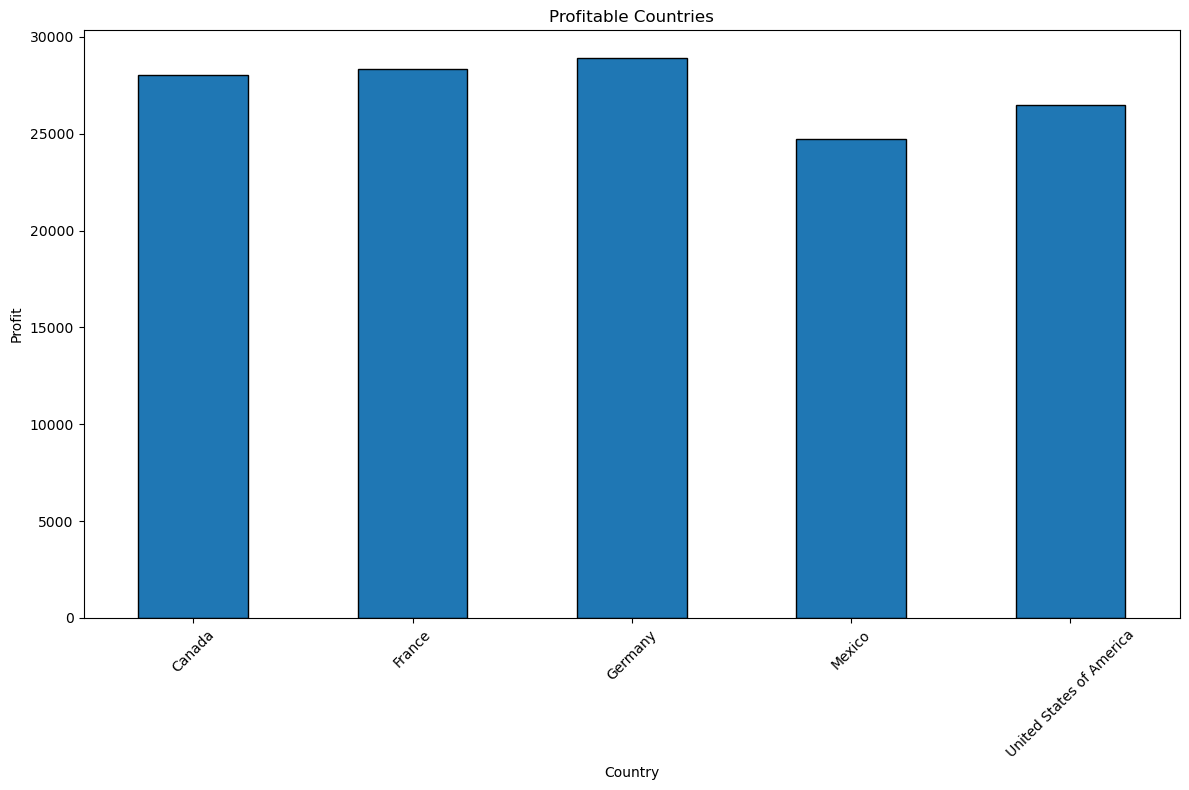

In [45]:
ax = df_profit.plot(kind='bar', figsize=(12, 8), edgecolor='black')

plt.xlabel("Country")
plt.ylabel("Profit")
plt.title("Profitable Countries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


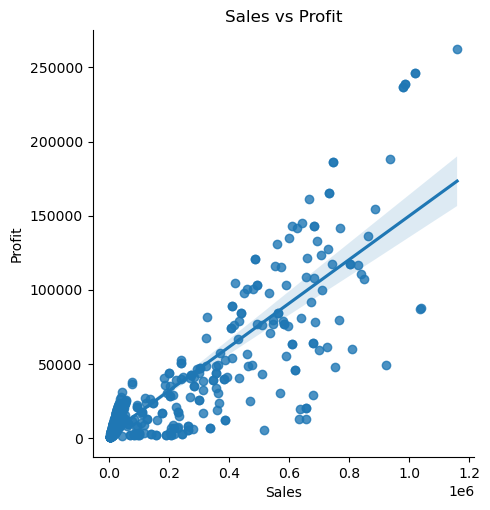

Correlation between Sales and Profit: 0.862294415626531


In [47]:
# Is higher sales always leading to higher profit?
sns.lmplot(x='Sales', y='Profit', data=df)
plt.title("Sales vs Profit")
plt.show()

# Correlation value
correlation = df['Sales'].corr(df['Profit'])
print("Correlation between Sales and Profit:", correlation)

Segment
Small Business      40086.130208
Government          36681.964929
Channel Partners    12781.346000
Midmarket            6474.173448
Enterprise           3283.084839
Name: Profit, dtype: float64


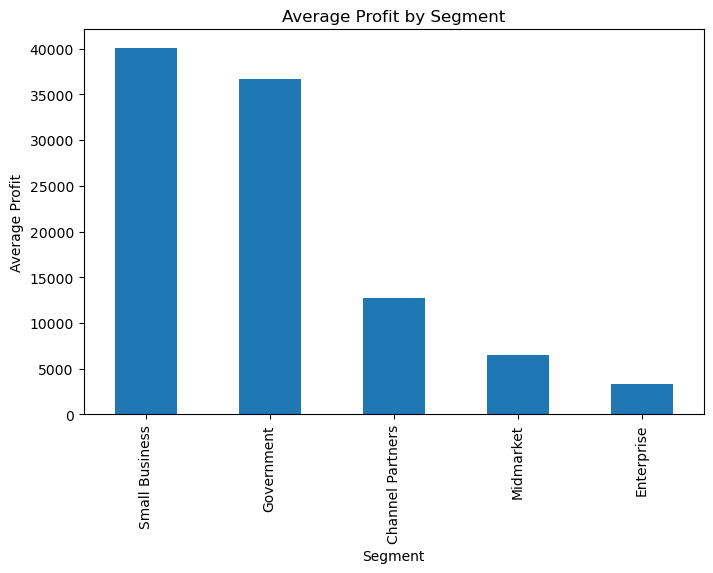

In [49]:
# Does any segment (like "Midmarket" or "Government") perform better?
# Average profit per segment
segment_profit = df.groupby('Segment')['Profit'].mean().sort_values(ascending=False)
print(segment_profit)

# Bar plot
segment_profit.plot(kind='bar', figsize=(8,5), title="Average Profit by Segment")
plt.ylabel("Average Profit")
plt.show()


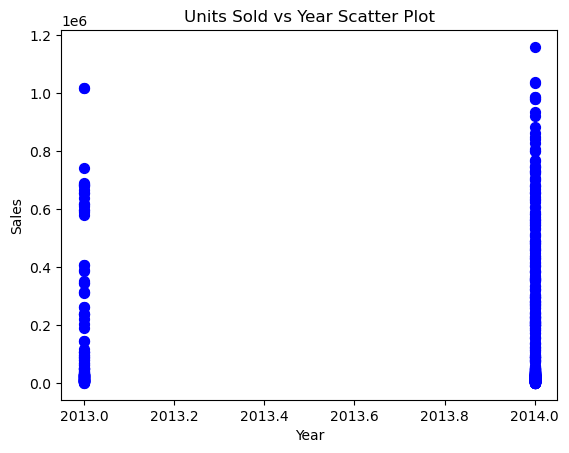

In [51]:
plt.scatter(df['Year'], df['Sales'], color='blue', marker='o', s=50)

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Units Sold vs Year Scatter Plot')

plt.show()

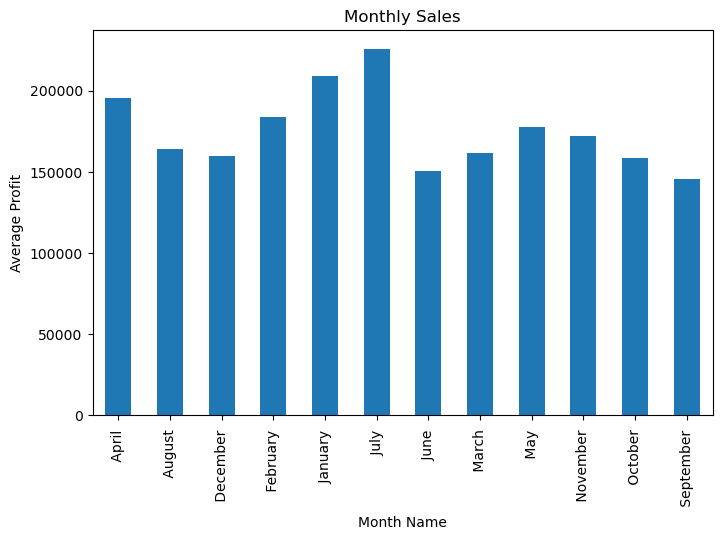

In [53]:
df_mon=df.groupby('Month Name')['Sales'].mean()
df_mon

df_mon.plot(kind='bar', figsize=(8,5), title="Monthly Sales")
plt.ylabel("Average Profit")
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression

In [59]:
df.Segment.unique()

array(['Government', 'Midmarket', 'Channel Partners', 'Enterprise',
       'Small Business'], dtype=object)

In [61]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Segment'] = encoder.fit_transform(df['Segment'])

In [65]:
df.Country.unique()

array(['France', 'Canada', 'United States of America', 'Mexico',
       'Germany'], dtype=object)

In [69]:
encoder=LabelEncoder()
df['Country']=encoder.fit_transform(df['Country'])

In [73]:
df.Product.unique()

array([' Paseo ', ' Velo ', ' VTT ', ' Carretera ', ' Montana ',
       ' Amarilla '], dtype=object)

In [77]:
encoder=LabelEncoder()
df['Product']=encoder.fit_transform(df['Product'])

In [85]:
df['Discount Band'].unique()

array([' Low ', ' Medium ', ' High '], dtype=object)

In [91]:
encoder=LabelEncoder()
df['Dicount Band']=encoder.fit_transform(df['Discount Band'])

In [95]:
df['Year'].unique()

array([2014, 2013], dtype=int64)

In [99]:
encoder=LabelEncoder()
df['Year']=encoder.fit_transform(df['Year'])

In [103]:
df=df.select_dtypes(['int','float'])
df

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year,Dicount Band
53,2,1,3,3945.0,10.0,7.0,27615.0,276.15,27338.85,19725.0,7613.85,1,1,1
54,3,1,3,2296.0,10.0,15.0,34440.0,344.40,34095.60,22960.0,11135.60,2,1,1
55,2,1,3,1030.0,10.0,7.0,7210.0,72.10,7137.90,5150.0,1987.90,5,1,1
56,2,1,5,639.0,120.0,7.0,4473.0,44.73,4428.27,3195.0,1233.27,11,1,1
57,2,0,4,1326.0,250.0,7.0,9282.0,92.82,9189.18,6630.0,2559.18,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,4,1,0,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,3,1,0
696,4,3,0,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,10,1,0
697,2,3,2,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,2,1,0
698,2,0,3,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,4,1,0


In [105]:
df.corr()

,Segment,Country,Product,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year,Dicount Band
Segment,1.000000,0.006973,0.041560,0.012830,0.017648,0.438484,0.366839,0.345127,0.361694,0.395317,0.133984,-0.019231,0.008708,0.020516
Country,0.006973,1.000000,0.020615,-0.099759,0.026683,0.010756,-0.006079,0.010733,-0.007607,-0.004386,-0.022519,-0.014070,-0.032945,-0.023895
Product,0.041560,0.020615,1.000000,-0.025229,0.023787,-0.014127,0.007327,0.027381,0.005215,0.012540,-0.032373,-0.009121,-0.004032,0.005783
Units Sold,0.012830,-0.099759,-0.025229,1.000000,-0.036230,-0.073598,0.302888,0.234016,0.303636,0.296264,0.291011,-0.108779,0.048927,-0.024493
Manufacturing Price,0.017648,0.026683,0.023787,-0.036230,1.000000,0.073517,0.047223,0.023595,0.048603,0.044629,0.060598,0.055191,-0.024099,0.010542
Sale Price,0.438484,0.010756,-0.014127,-0.073598,0.073517,1.000000,0.810611,0.677894,0.807552,0.808381,0.671489,-0.015795,0.018774,0.004742
Gross Sales,0.366839,-0.006079,0.007327,0.302888,0.047223,0.810611,1.000000,0.814321,0.998379,0.996545,0.844506,-0.044603,0.055019,0.001077
Discounts,0.345127,0.010733,0.027381,0.234016,0.023595,0.677894,0.814321,1.000000,0.779966,0.811914,0.492337,-0.083864,0.040781,-0.151156
Sales,0.361694,-0.007607,0.005215,0.303636,0.048603,0.807552,0.998379,0.779966,1.000000,0.994889,0.862294,-0.039868,0.055324,0.015984
COGS,0.395317,-0.004386,0.012540,0.296264,0.044629,0.808381,0.996545,0.811914,0.994889,1.000000,0.806754,-0.044502,0.057124,0.003703


In [109]:
df.isnull().sum()

Segment                0
Country                0
Product                0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Month Number           0
Year                   0
Dicount Band           0
dtype: int64

In [169]:
X=df[['Units Sold', 'COGS', 'Sale Price', 'Discounts']]
y=df['Profit']

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.metrics import r2_score

In [173]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)
y_test

469      2765.00
514    108381.75
143     84304.00
573      1729.56
627     11968.00
         ...    
337     13201.00
699     13003.20
562     29904.00
512     14841.00
600      1297.10
Name: Profit, Length: 176, dtype: float64

In [175]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [177]:
X_test_predict=regression.predict(X_test)
X_test_predict

array([ 2.39483488e+02,  7.05231251e+04,  1.07609864e+05,  3.44353636e+03,
        4.49908152e+04,  6.52682959e+03,  3.55609396e+04,  7.72027044e+04,
        1.26343636e+04, -2.13277107e+03,  6.45483908e+04,  6.79821018e+03,
        1.96354510e+03,  4.88148981e+03,  2.04582216e+03,  4.61459445e+04,
        1.44632225e+04,  6.16683739e+03,  6.08048251e+04,  4.29652508e+04,
        1.48279762e+03, -1.80117189e+03,  1.37460202e+03,  4.65440469e+03,
       -3.65610007e+03,  1.07609864e+05,  5.91840448e+04,  5.90292570e+04,
        4.42826565e+04,  1.30938705e+05,  1.95098806e+03,  1.55289820e+04,
        1.14349202e+05,  3.64589745e+03,  3.12417714e+04,  4.08536882e+03,
        1.06843398e+04, -3.30833508e+03,  4.86065774e+04,  2.00975109e+04,
        1.04142409e+03,  7.83893602e+03,  6.02506023e+04,  1.11604089e+04,
        9.32714411e+03, -3.73638730e+02,  8.14291357e+04,  9.91251047e+03,
        1.89502964e+04,  6.92292103e+04,  4.62415174e+04,  5.60582361e+03,
        1.60867520e+05,  

In [179]:
r2_score(y_test,X_test_predict)

0.7066120128538631